<a href="https://colab.research.google.com/github/Asingh1248/TensorFlow_in_Practice/blob/master/Week3_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Try with the ANN for Fashion MNIST which is in Week2 on

In [ ]:
# You will Observe loss: 0.3594 - acc: 0.8744  in train set
# Your accuracy is probably about 89% on training and 87% on validation...not bad..
# .But how do you make that even better? One way is to use something called Convolutions

# Not visit each and every pixel in ANN instead we detect certain edge (features) for e.g for Shoes its Shoelace, Bag : handle :

# What is CNN ?

In [ ]:
# Convulations : Appyling a filtering matrix (3 x3 )over the each pixel .
# Filtering matrix : has certain value to detect the edge(show lace and handle : to detect the )
# Pooling : 4 x 4 Matrix we take the largest value and form new compressed image . (So as to remove uneamted part)

# Pooling : Maths : Refer the Second Video

# Whats the Logic of CNN

In [ ]:
# Convolution is the process of adding each element of the image to its local neighbors, weighted by the kerne
# if we have two three-by-three matrices, the first a kernel, and the second an image piece

# you'll see a 3x3 that is defined for edge detection where the middle cell is 8, 
#  Maths : Refer the Second Video where current value of pixel to some under value 

In [ ]:
SHIO

# Improving Computer Vision through CNN

## Import,Providing Data, Reshaping it , Normalising 

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

2.2.0


In [ ]:
#  Explaination :
# Reshape : 60000 - No of Train Image , 28 x28 =784 pixels , 1 color depth of the image (gray scale)

## Building the Model with adding extra 4 step of CNN along with 3 steps of ANN

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Whats Exactly is Happening : For Every Image 64 Covulations is tried , 
# Compressed , pass through ANN hence its might few minutes and hence loss is imporved bit

# Note there is 2 Convulations layers 

In [ ]:
# Explaination
 
 # relu : Remove all the neagtive values
 # Conv2D(64) -- No of Filters -- Each filters gets improved by learning itself again and again(like ANN),
 # Conv2D(3,3) - Matrix of 3x3 size
 # MaxPool2D(2,2) -- Refer the Diagram in Second video 4x4  == 2x2 (Compressing the index by taking only highest)

## Compiling the CNN

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# Explaination of Output :
# Why Conv2D -- > (None, 26, 26, 64) instead of 28 x28 ? As on the corner pixel on top at botton we cannot have filters applied 
                                  #hence 2 pixel smaller on x and 2 pixel smaller on y reduce its becomes from 28 to 26
# Why MaxPooling2D -- > (None, 13, 13, 64)  Whole image is comprrsed in half # as 4 x 4 pixel is compreesed to 2x2 pixel
                  # Refer the Diagram in google docs

                  # Why (None,11,11,64) -- Margin Issue 
  ## V.Imp Now before going into ANN our image is 5 x5 instead of 28 x28 this is most imp EFFECT OF CNN

# Flatten --> (None, 1600) Instead of 784(28x28) 
  # Now we have 64 image with each image 5 x5 pixel and if we flatten that out : 5x5x64=1600 pixels


## Fit and evaluate the model

In [ ]:
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.4386 - accuracy: 0.8411
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2905 - accuracy: 0.8939
Epoch 3/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2443 - accuracy: 0.9098
Epoch 4/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2128 - accuracy: 0.9209
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.2549 - accuracy: 0.9061
0.9060999751091003


In [ ]:
# Instead of loss: 0.3594 - acc: 0.8744  in test set in ANN navive method and it took around 25 seconds

# we are getting : loss: 0.2718 - accuracy: 0.9037 Takes few minutes 

# Visualizing the Convolutions and Pooling
Journey of the Image through Convulations

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


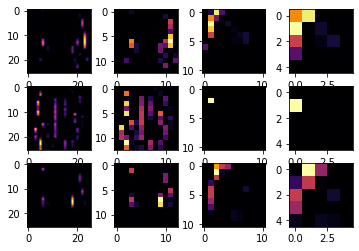

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0 # shoe - 9
SECOND_IMAGE=23 # shoe  - 9
THIRD_IMAGE=28 # shoe  - 9
CONVOLUTION_NUMBER = 1 # try with 2,4
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
# Explainations : Keras API gives us Each Convulations, each Pooling and each Dense as layers
# So with the layers API I can take a look at each layer output 
# Step 1 (layer_outputs): Create a list of Each layers Output.
# Step 2 (activation_model): Treat each item in the layer as an individual activation model if I want to sse the O/P of just that layer.
# Step 3 : Looping through the layers
# Step 4() : Displaying the Journey of the Image through first Convulation and then first pooiling and second Convulation N

# Note Size of the image is changing
# It aslo detects the laces area as a common features between the shoes  

# Handlag : bootm it will show but futher convuation lyer will disapper it 

# See Commonlaity in different image try 2,3,5 Image

# Convualtion detects the vertical image and detexts its has trouser



# Exercise

Try editing the convolutions. Change the 32s to either 16 or 64. What impact 
will this have on accuracy and/or training time.

Remove the final Convolution. What impact will this have on accuracy or training time?

How about adding more Convolutions? What impact do you think this will have? Experiment with it.

Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here